# Smoothing a Graph

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MglEfisPlotter import *

In [3]:
datafile = '../data/IEFISBB.DAT.03'
minTimestamp = 429600874
maxTimestamp = 1000000000

flights = createFlights(datafile, minTimestamp, maxTimestamp)
for i in range(0, len(flights)):
    print(i, flights[i])
f = flights[-1]

0 Flight at 2019-03-19 17:03:36-17:10:14,  1712 messages, 484905186-484905612
1 Flight at 2019-03-20 15:10:04-15:15:09,  1304 messages, 485028482-485028806
2 Flight at 2019-03-20 15:31:49-15:52:07,  5010 messages, 485029870-485031173
3 Flight at 2019-03-19 13:30:12-14:02:05,  8103 messages, 484890506-484892803
4 Flight at 2019-03-19 15:46:47-17:03:33, 19424 messages, 484899757-484905184


## Raw Data

The raw data has multiple datapoints per second (per timestamp) and timestamps almost every second (almost 60 per minute).

In [4]:
vsi = pd.DataFrame(f.listData('vsi'))
vsi.head(10)

,minutes,timestamp,vsi
0,0.000000,484899757,109
1,0.000000,484899757,53
2,0.000000,484899757,109
3,0.000000,484899757,53
4,0.066667,484899761,164
5,0.066667,484899761,164
6,0.150000,484899766,59
7,0.150000,484899766,59
8,0.216667,484899770,770
9,0.216667,484899770,1040


When plotted, this makes a jagged graph

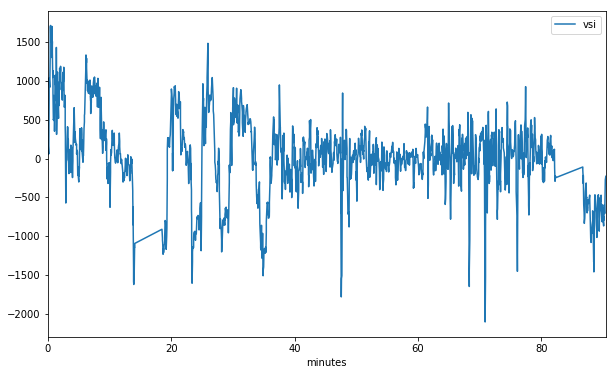

In [5]:
vsi.plot(x='minutes', y='vsi', figsize=(10,6))

## Smooth the Data

Transform the data:

* Round the minutes to one decimal place.
* Group the VSI values by minute value (tenths of a minute).
* Calculate the mean of each group.

In [6]:
t = vsi.round(1).groupby(['minutes'])[['vsi']].mean()
t.head(10)

,vsi
minutes,
0.0,81.00
0.1,164.00
0.2,482.00
0.3,918.00
0.4,1548.80
0.5,1563.50
0.6,1575.20
0.7,1469.75
0.8,1000.80


The plot looks nicer now

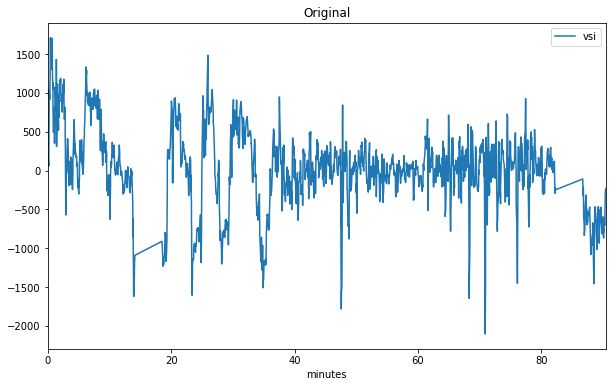

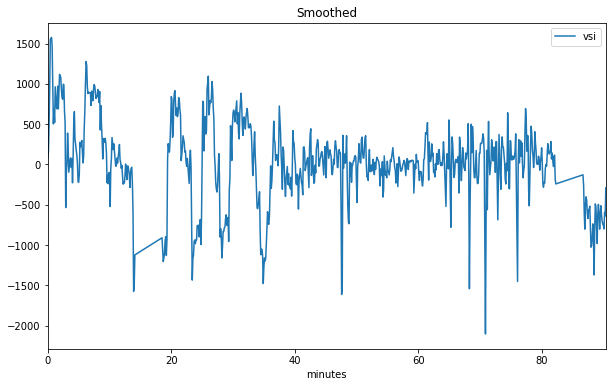

In [7]:
vsi.plot(x='minutes', y='vsi', title='Original', figsize=(10,6))
plt.show()
t.plot(title='Smoothed', figsize=(10,6))
plt.show()